# BUILD A GANTT CHART!

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta
import pandas as pd
import matplotlib.cm as cm

## Fill out tasks and dates in .csv file, then change colors if needed, and done!

In [11]:
title = "Remainder of Ph.D. Gantt Chart"

In [12]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("project_tasks.csv", parse_dates=["start", "end"])
df.sort_values("start", inplace=True)      # optional tidy-up

# Convert to list[tuple] for the plotting code
tasks = list(df.itertuples(index=False, name=None))


# And plotting!

In [13]:
# Pick colours if you don't like this ones! 
# see here: https://matplotlib.org/stable/gallery/color/named_colors.html
# palette = ["cornflowerblue",  
#            "lightblue",   
#            "burlywood",   
#            "bisque",  
#            'wheat',
#            "plum", 
#            "lightpink"]  
# assert len(palette) >= len(tasks), "Not enough colors in palette for tasks"

cmap    = cm.get_cmap("Set3")              # any built-in cmap
palette = [cmap(i / len(tasks)) for i in range(len(tasks))]

/var/folders/d3/x10lxf7x1n37__s3n36qxmlw0000gp/T/ipykernel_57109/2156335151.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap    = cm.get_cmap("Set3")              # any built-in cmap


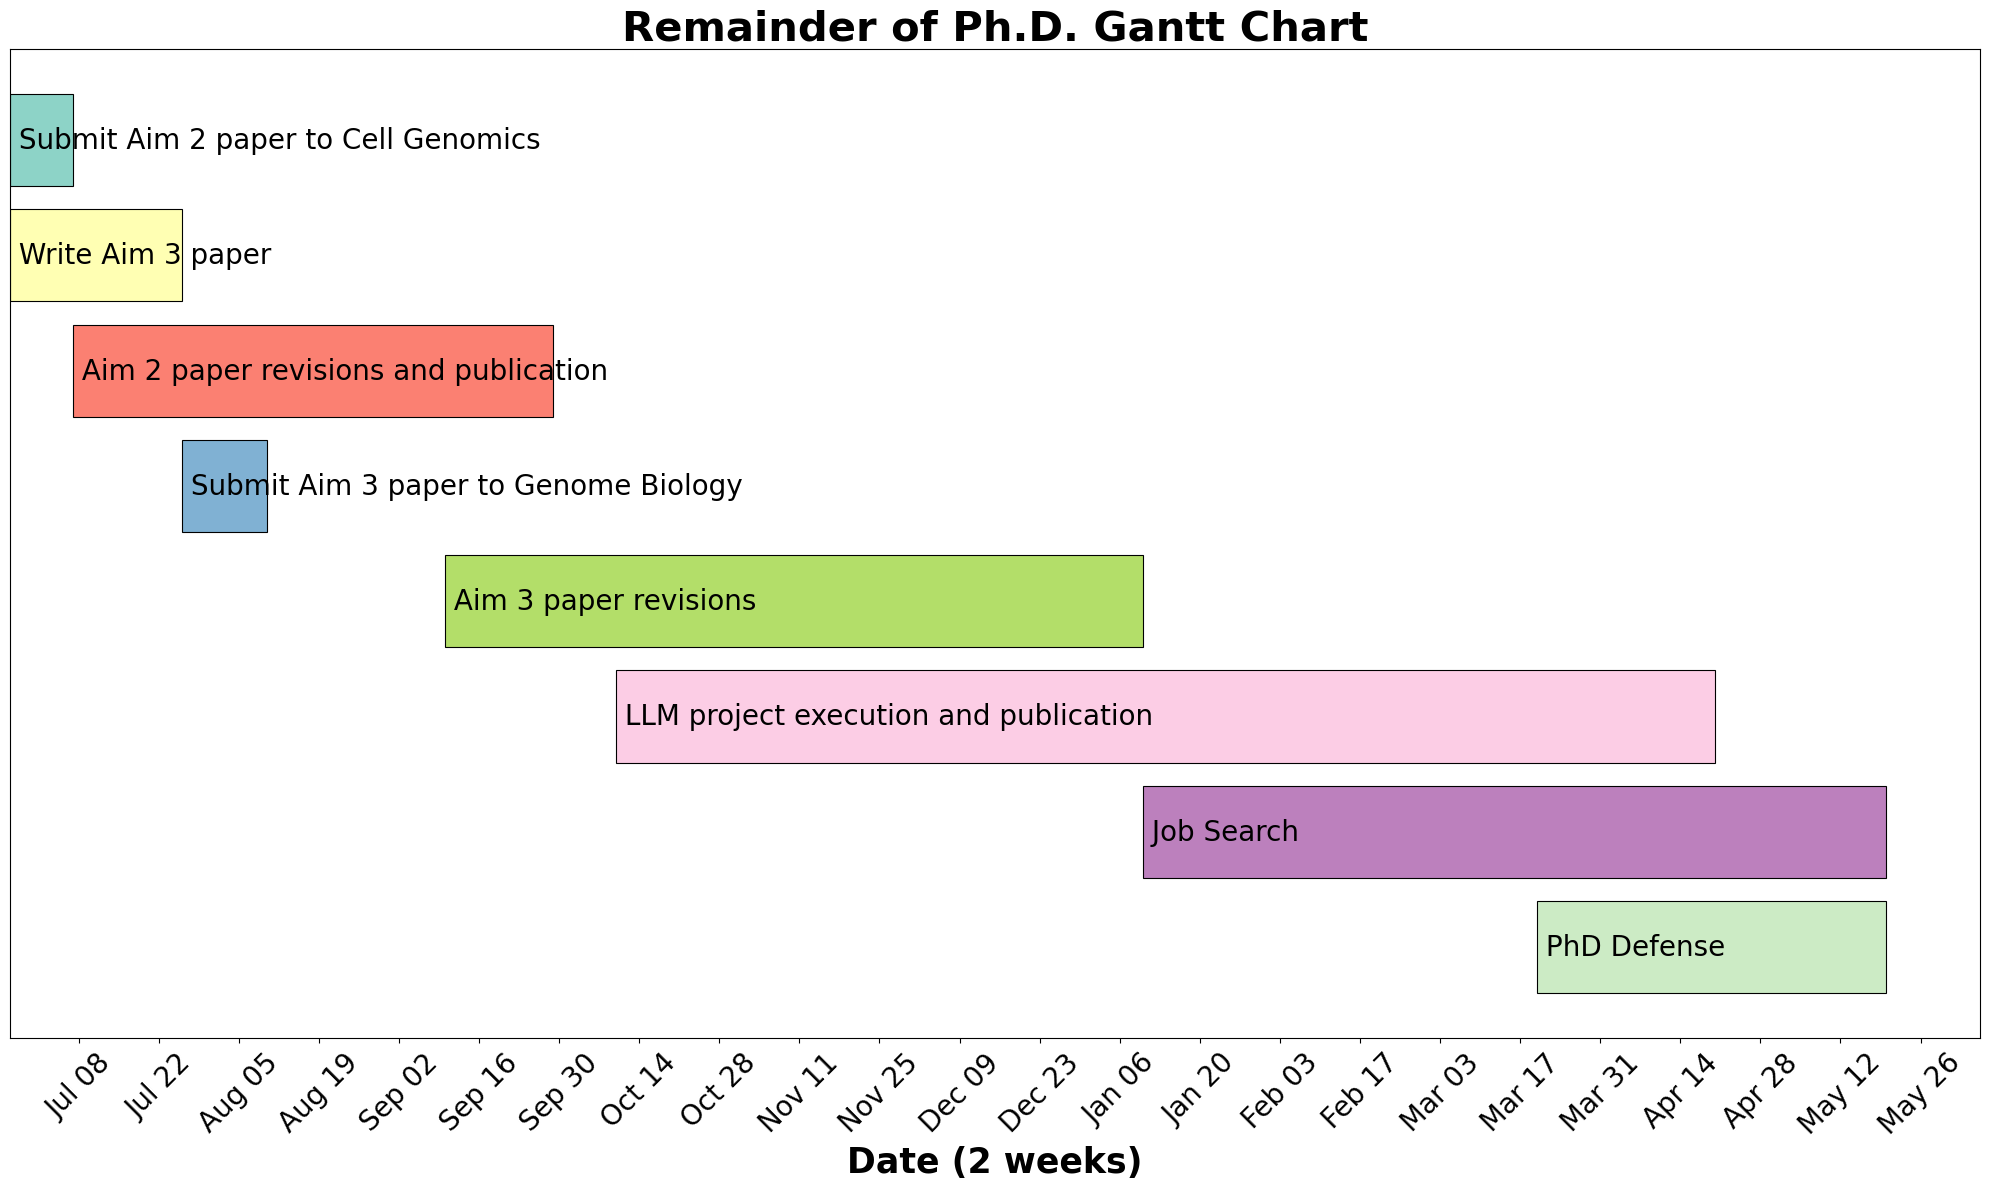

In [19]:
# Build the Gantt chart ---------------------------------------------
fig, ax = plt.subplots(figsize=(20, 12))

for i, (name, start, end) in enumerate(tasks):
    #  Validate the dates
    if end < start:
        raise ValueError(
            f"'{name}': end date {end:%Y-%m-%d} is before start {start:%Y-%m-%d}"
        )

    # 2 Treat milestones (start == end) as 1-day bars or markers
    if end == start:
        end = start + timedelta(days=1)

    left  = mdates.date2num(start)
    width = mdates.date2num(end) - left
    ax.barh(i, width, left=left, color=palette[i], edgecolor="black", linewidth=1)
    ax.text(left, i, f" {name}", va="center", ha="left", fontsize=20)

ax.set_yticks([])
ax.set_xlabel("Date (2 weeks)", fontsize=25, fontweight="bold")
ax.set_title(f"{title}", fontsize=30, fontweight="bold")
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.xticks(fontsize=20, rotation=45)
ax.invert_yaxis()
plt.tight_layout()
plt.show()